source
- https://www.youtube.com/watch?v=U4t1CBDMlmg
- https://github.com/adriaan90/ideal-rankine-cycle

In [1]:
# Determine the efficiency of a Rankine cycle using steam
# as the working fluid in which the condenser pressure is 10 kPa.
# The boiler pressure is 2 MPa. The steam leaves
# the boiler as saturated vapor.

# Initiate PYroMat and configure its units:

import pyromat as pm

pm.config["unit_pressure"] = "kPa"
pm.config["def_p"] = 100


In [2]:
mp_water = pm.get("mp.H2O")

In [3]:
# To solve this problem we consider a control surface around the pump,
# the boiler, the turbine, and the condenser.

# First, consider the pump:
#saturated liquid, thus x = 0
p1 = 10
T1 = mp_water.Ts(p=p1)[0]
s1 = mp_water.ss(p=p1)[0]
p2 = 2000
s2= s1
v = 1/mp_water.ds(p=p1)[0]

w_p = v*(p2-p1)
print(f"Work required by pump: {round(float(w_p),1)} kJ/kg")

h1 = mp_water.hs(p=p1)[0]
h2 = h1+w_p
T2 = mp_water.T_h(p=p2,h=h2)

print(f"h2 = {round(float(h2),1)} kJ/kg")

Work required by pump: 2.0 kJ/kg
h2 = 193.8 kJ/kg


In [4]:
# Next, lets consider the boiler:
# steam leaves the boiler as saturated vapor, thus x = 1
p3 = p2
T3 = mp_water.Ts(p=p3)

h3 = mp_water.hs(p=p3)[1]
s3dash = mp_water.ss(p=p3)[0]
T3dash = T3
s3 = mp_water.ss(p=p3)[1]
q_H = h3-h2

print(f"Heat input by boiler: {round(float(q_H),1)} kJ/kg")

Heat input by boiler: 2604.5 kJ/kg


In [5]:
# Now, we consider the turbine:
p4 = p1
s4 = s3
T4, x = mp_water.T_s(s=s4,p=p4, quality=True)
h4 = mp_water.h(p=p4,x=x)
w_t = h3-h4
print(f"Quality of low pressure steam: {round(float(x),4)}")
print(f"Work generated by turbine: {round(float(w_t),1)} kJ/kg")

Quality of low pressure steam: 0.7587
Work generated by turbine: 791.7 kJ/kg


In [6]:
# Finally, we consider the condenser:
q_L = h4-h1
print(f"Heat rejected by the condenser: {round(float(q_L),1)} kJ/kg")

Heat rejected by the condenser: 1814.8 kJ/kg


In [7]:
# We can now calculate the thermal efficiency with $$\eta_{th}=\frac{w_{net}}{q_H}$$
eta_th = (w_t-w_p)/q_H*100
print(f"Thermal efficiency is: {round(float(eta_th),1)}%")

Thermal efficiency is: 30.3%


c:\python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text([6.43908243], [318.9556078], '(4)\nT = 318.96 K\nh = 2006.6 kJ/kg \ns = 6.339 kJ/kgK\nx = 0.759')

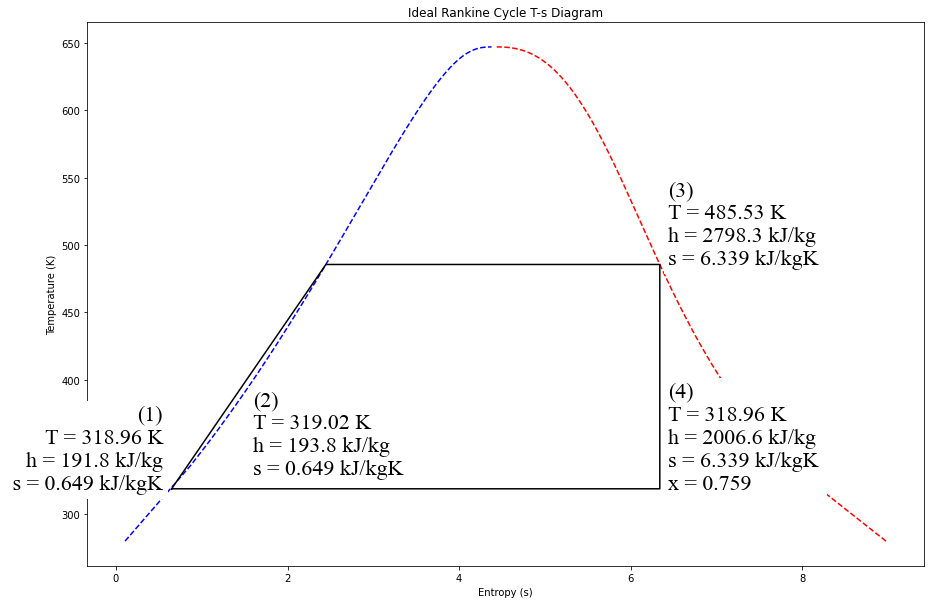

In [8]:
# We can also show the Rankine cycle visually
# by creating a graph

import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(1,22063,1000)
T = mp_water.Ts(p=p)
s = mp_water.ss(p=p)

font = {'family' : 'Times New Roman',
        'size'   : 22}

plt.figure(figsize=(15,10))
plt.title('Ideal Rankine Cycle T-s Diagram')
plt.rc('font', **font)
plt.plot(s[0],T, 'b--')
plt.plot(s[1],T,'r--')
plt.ylabel('Temperature (K)')
plt.xlabel('Entropy (s)')
plt.plot([s1, s2, s3dash, s3, s4, s1],[T1, T2, T3dash, T3, T4, T1], 'black')

plt.text(s1-.1,T1,f'(1)\nT = {round(float(T1),2)} K\nh = {round(float(h1),1)} kJ/kg\n s = {round(float(s1),3)} kJ/kgK',
    ha='right',backgroundcolor='white')
plt.text(1.6,330,f'(2)\nT = {round(float(T2),2)} K\nh = {round(float(h2),1)} kJ/kg \ns = {round(float(s2),3)} kJ/kgK',
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T3,f'(3)\nT = {round(float(T3),2)} K\nh = {round(float(h3),1)} kJ/kg \ns = {round(float(s3),3)} kJ/kgK',
    ha='left',backgroundcolor='white')
plt.text(s4+.1,T4,f'(4)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \ns = {round(float(s4),3)} kJ/kgK\nx = {round(float(x),3)}',
    ha='left',backgroundcolor='white')